<a href="https://colab.research.google.com/github/EddyKubwimana/83082025_Churning_Customers/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Getting library necessary for the project**


In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.7 MB/s eta 0:00:00


In [138]:
import pandas as pd
import seaborn as sns
from matplotlib  import  pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam, Nadam,Adamax,Adagrad,RMSprop,SGD,Adadelta
from keras.layers import Input,Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
import shap

# **Data loading**

In [72]:
customerdata = pd.read_csv("/content/drive/MyDrive/IntroAi/CustomerChurn_dataset.csv")

#**Data inspection**

In [73]:
customerdata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**verifying if the dataset have  missing values**

In [74]:
customerdata.info()
# The data does not have a missing values, there is no need for imputatation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#**Separation of categorical and numerical variables**

In [75]:
categoricaldata = customerdata.select_dtypes(include = ["object"])

In [76]:
categoricaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   Partner           7043 non-null   object
 3   Dependents        7043 non-null   object
 4   PhoneService      7043 non-null   object
 5   MultipleLines     7043 non-null   object
 6   InternetService   7043 non-null   object
 7   OnlineSecurity    7043 non-null   object
 8   OnlineBackup      7043 non-null   object
 9   DeviceProtection  7043 non-null   object
 10  TechSupport       7043 non-null   object
 11  StreamingTV       7043 non-null   object
 12  StreamingMovies   7043 non-null   object
 13  Contract          7043 non-null   object
 14  PaperlessBilling  7043 non-null   object
 15  PaymentMethod     7043 non-null   object
 16  TotalCharges      7043 non-null   object
 17  Churn         

In [77]:
numericaldata = customerdata.select_dtypes(exclude = ["object"])

In [78]:
numericaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 165.2 KB


#**Data Analysis and visualisation**

Numerical data

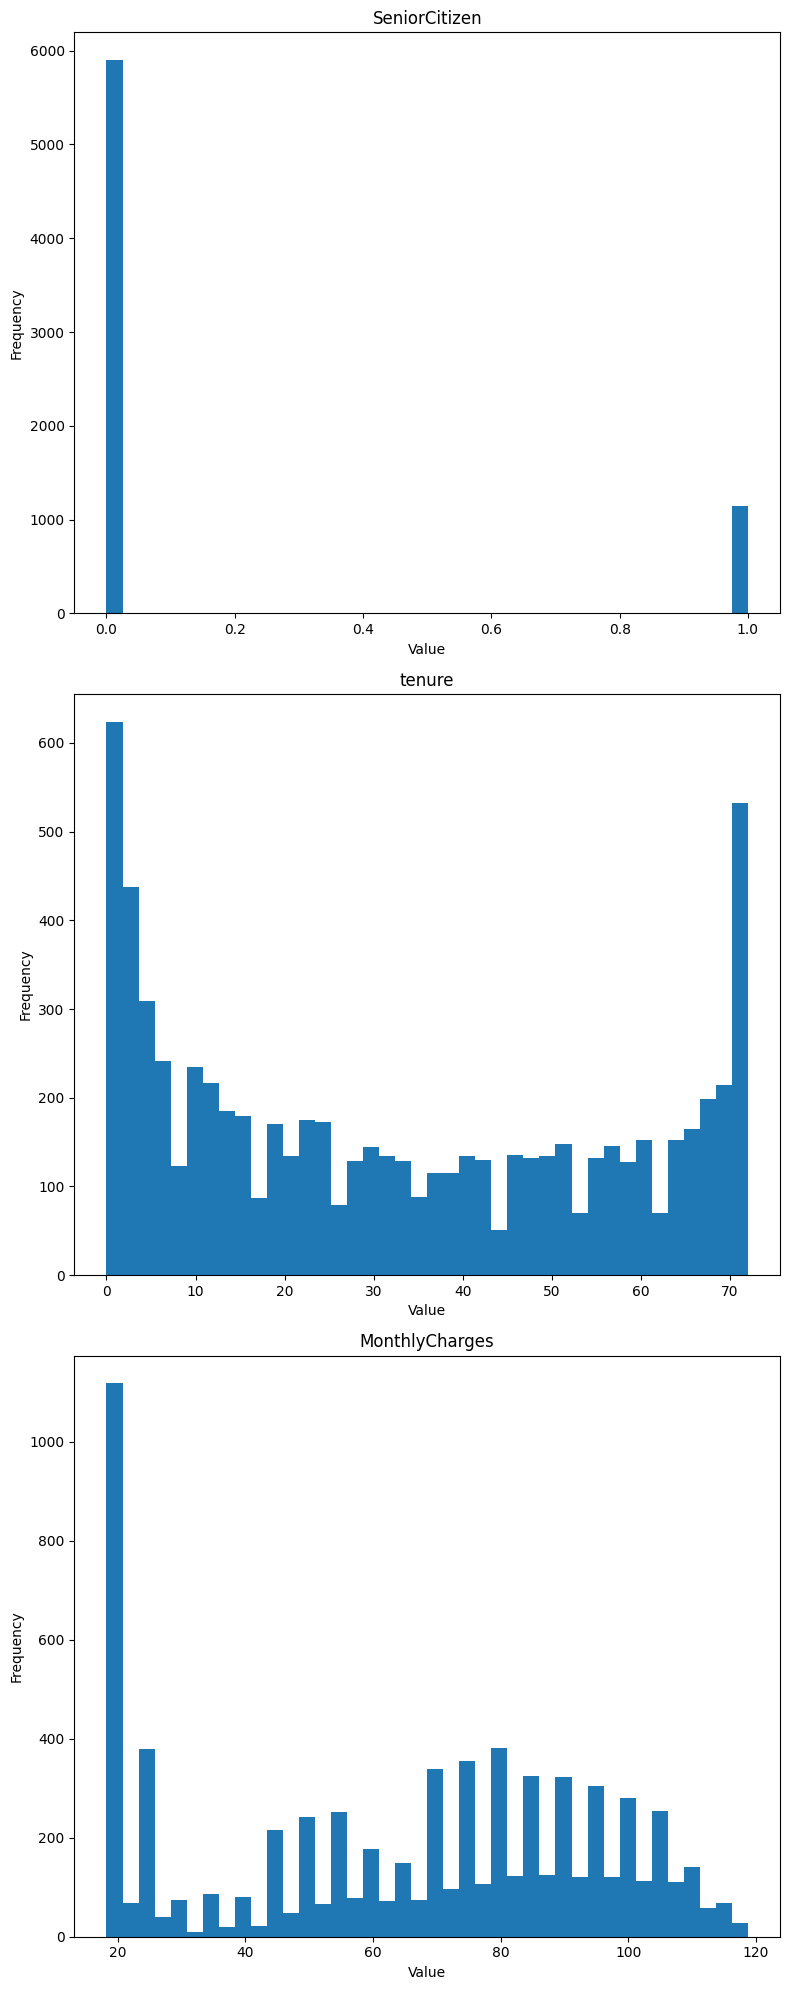

In [79]:
num_columns = len(numericaldata.columns)
fig, axes = plt.subplots(num_columns, 1, figsize=(8, 20))

for i in range(num_columns):
    column_name = numericaldata.columns[i]
    axes[i].hist(numericaldata[column_name], bins=40)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

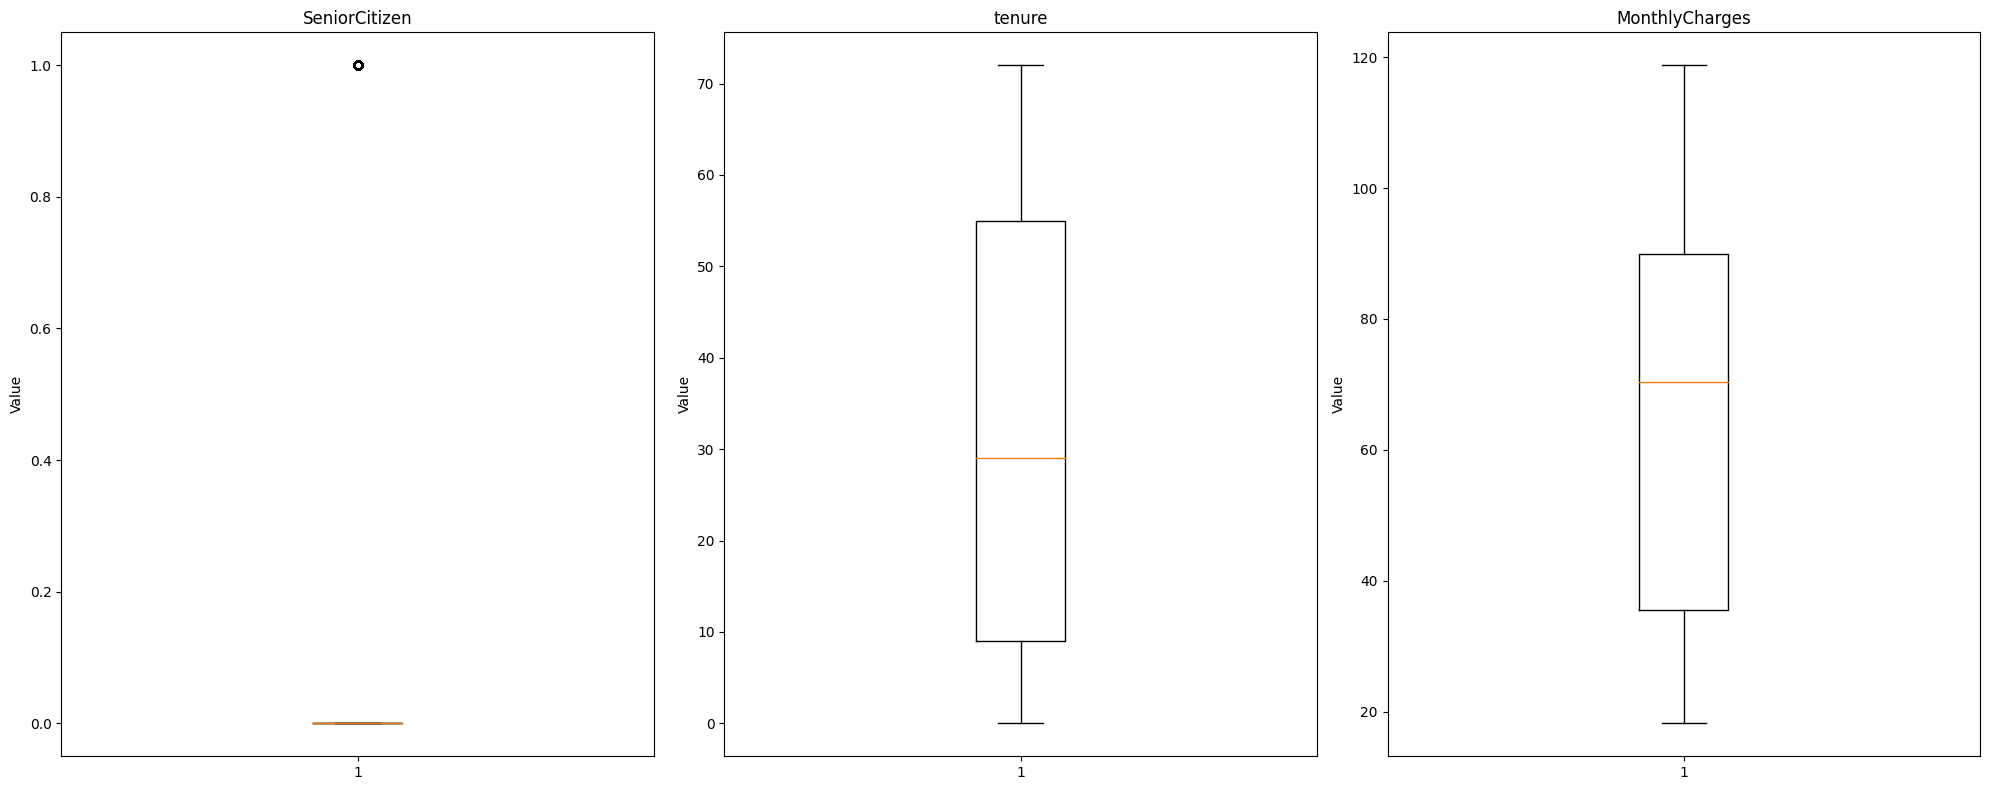

In [80]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

for i in range(num_columns):
    column_name = numericaldata.columns[i]
    axes[i].boxplot(numericaldata[column_name])
    axes[i].set_title(column_name)
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()


 categorical data

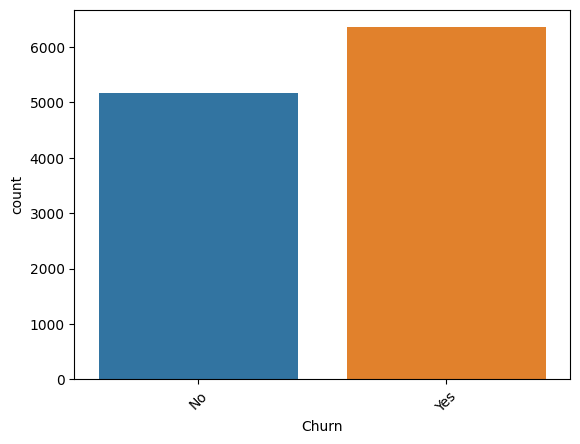

In [81]:
for i in categoricaldata.columns:
  sns.countplot(x = categoricaldata[i],data=categoricaldata)
  plt.xticks(rotation=45)

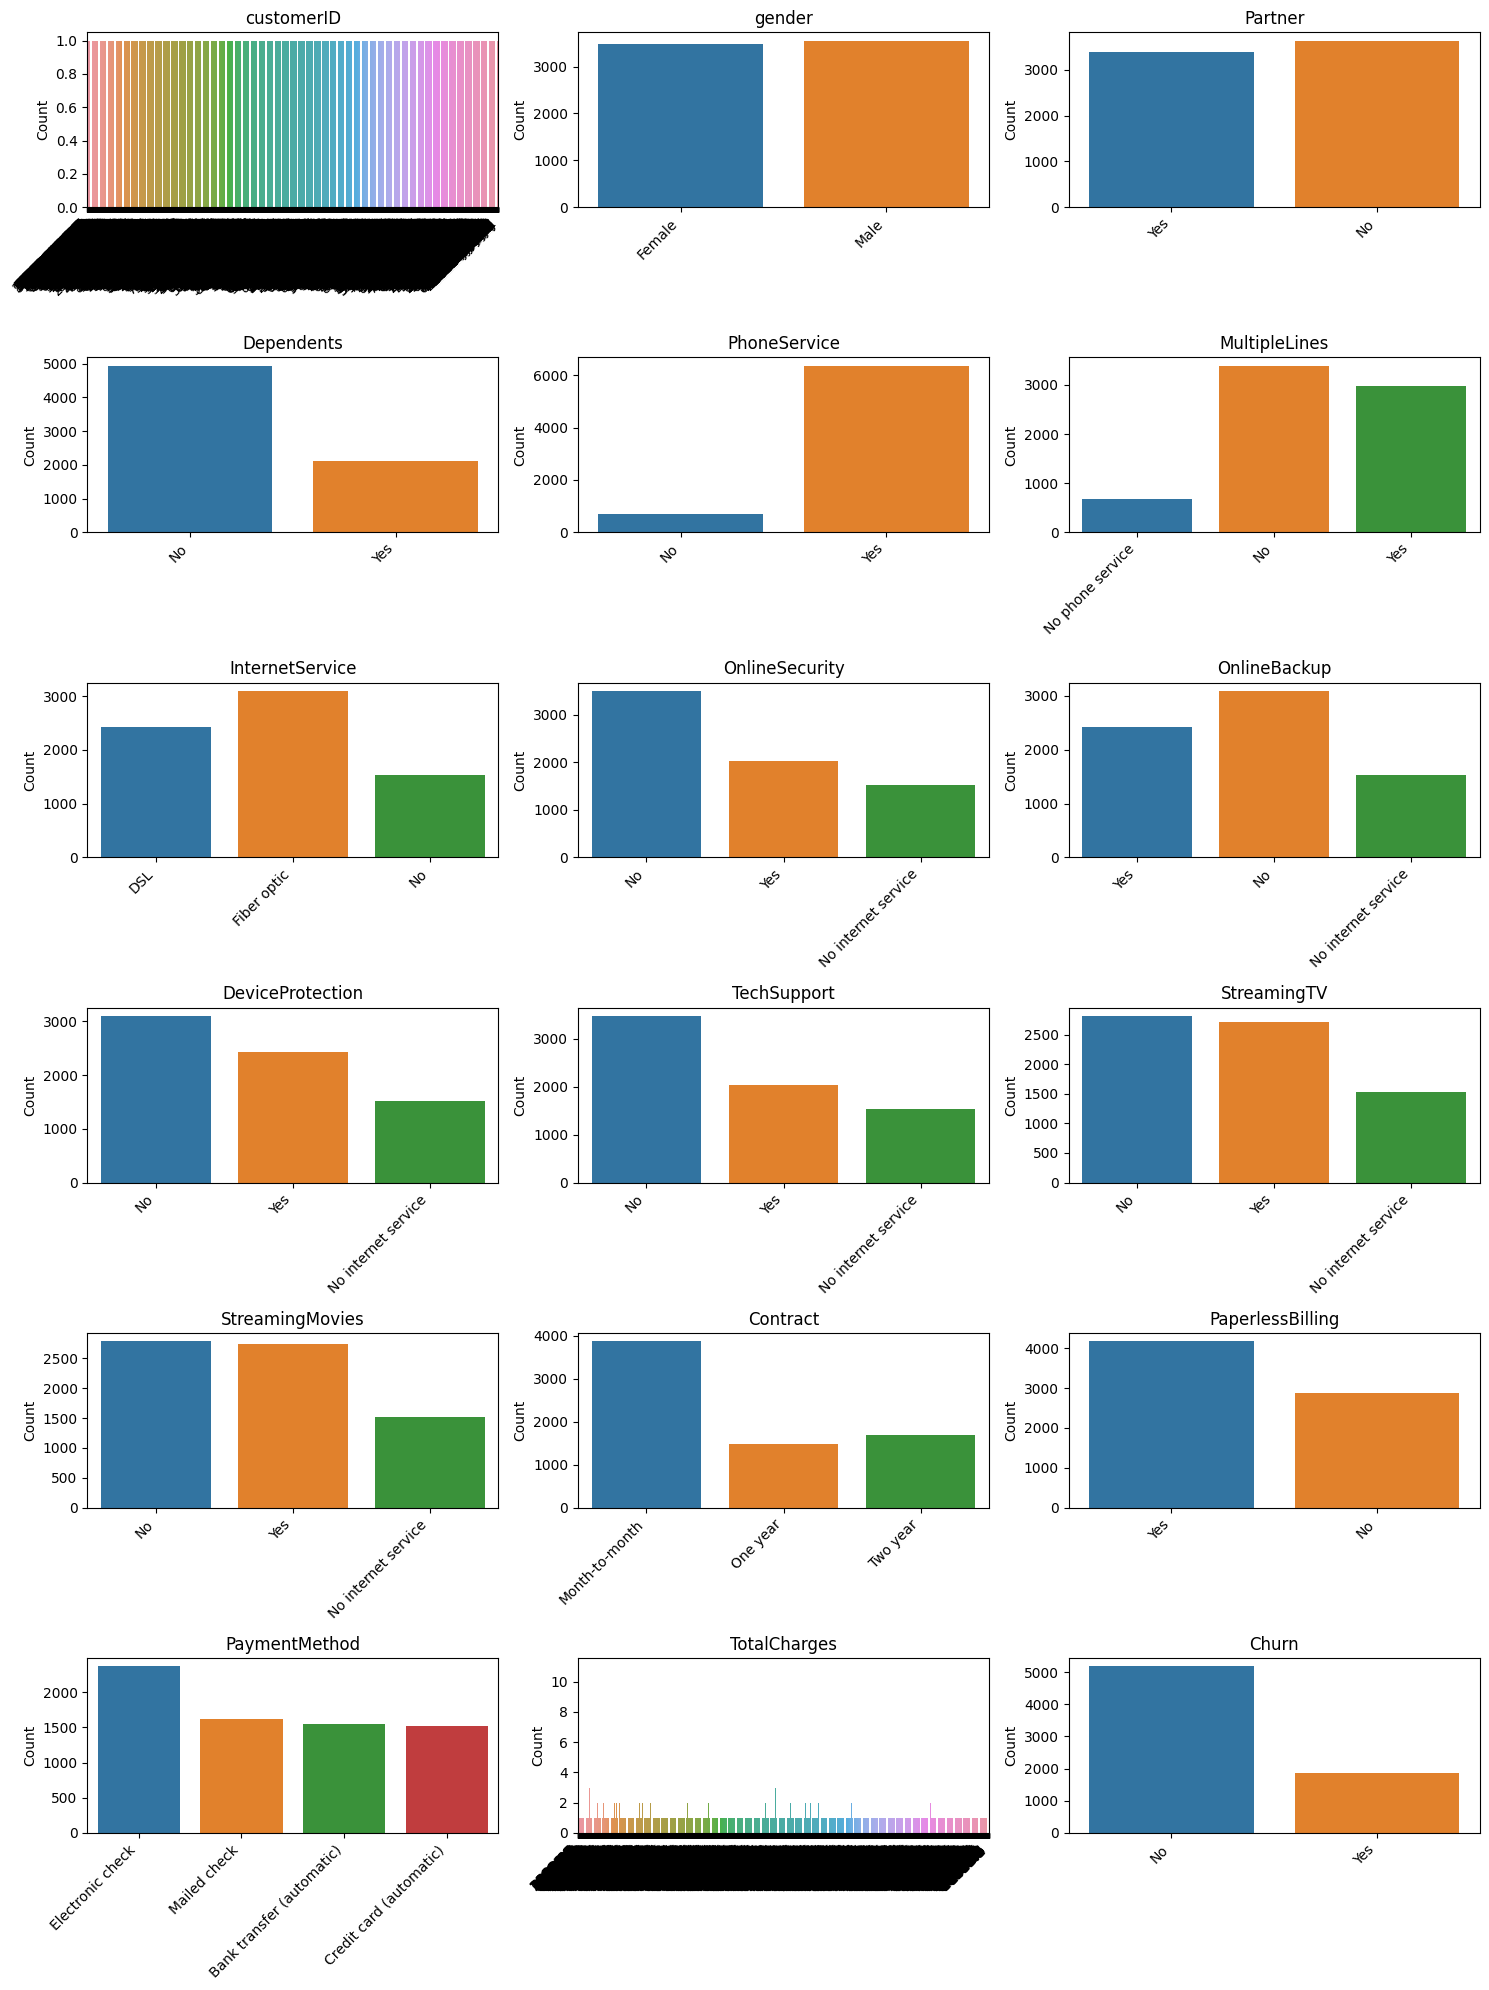

In [82]:

num_rows = 6
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
axes = axes.ravel()

for i, column in enumerate(categoricaldata.columns[:18]):
    ax = axes[i]
    sns.countplot(x=column, data=categoricaldata, ax=ax)
    ax.set_title(column, fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_xlabel('')
    ax.set_ylabel('Count')

for i in range(18, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


After visualisation, I spotted that The total charges is categorical data but it should be a numerical data and I have also saw that CustomerId is meaningless because it does not have a meaning that can influence the churn variable. For that reason, I will convert total charges into a numerical data and drop customerID

In [83]:
#conversion of TotalCharges into float datatype
TotalCharges =[]
counter = 0

for i in categoricaldata["TotalCharges"]:

   if i != " ":
     TotalCharges.append(float(i))
   else:
      TotalCharges.append(np.nan)




In [84]:
# Dropping of customerId and totalCharges
categoricaldata.drop(["TotalCharges","customerID"], axis = 1, inplace = True)

In [85]:
categoricaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   Partner           7043 non-null   object
 2   Dependents        7043 non-null   object
 3   PhoneService      7043 non-null   object
 4   MultipleLines     7043 non-null   object
 5   InternetService   7043 non-null   object
 6   OnlineSecurity    7043 non-null   object
 7   OnlineBackup      7043 non-null   object
 8   DeviceProtection  7043 non-null   object
 9   TechSupport       7043 non-null   object
 10  StreamingTV       7043 non-null   object
 11  StreamingMovies   7043 non-null   object
 12  Contract          7043 non-null   object
 13  PaperlessBilling  7043 non-null   object
 14  PaymentMethod     7043 non-null   object
 15  Churn             7043 non-null   object
dtypes: object(16)
memory usage: 880.5+ KB


Adding the total charge columns to numericaldata dataframe

In [86]:
numericaldata["TotalCharges"] = TotalCharges

In [87]:
#inspecting the numerical data
numericaldata.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


visualization of the TotalCharges columns

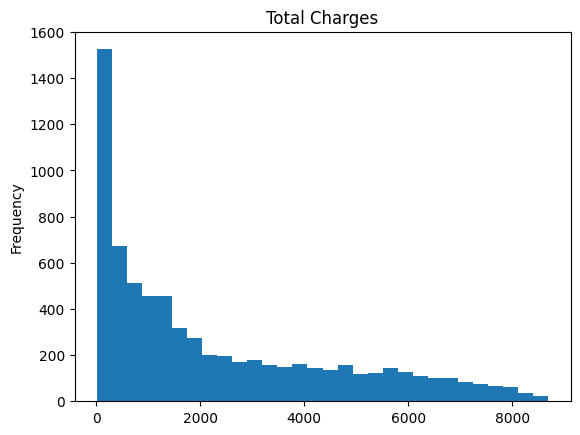

In [88]:
plt.hist(numericaldata["TotalCharges"], bins=30)
plt.ylabel('Frequency')
plt.title('Total Charges')
plt.show()

# dataframe of encoding category

Categorical data encoding using factorization

In [89]:
for i in categoricaldata.columns:
     categoricaldata[i] = pd.factorize(categoricaldata[i])[0]



fill the 0 wiht median due to the distribution of the data in Total charges that I added at the top in Total Charge column

In [90]:

numericaldata["TotalCharges"].fillna(numericaldata["TotalCharges"].median(), inplace = True)

In [91]:
finaldata = pd.concat([numericaldata, categoricaldata], axis =1)

In [92]:
finaldata.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1889.50,1,1,0,1,1,0,1,1,1,0,0,0,1,1,1,0
2,0,2,53.85,108.15,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1
3,0,45,42.30,1840.75,1,1,0,0,0,0,1,1,1,1,0,0,1,1,2,0
4,0,2,70.70,151.65,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1


In [93]:
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   tenure            7043 non-null   int64  
 2   MonthlyCharges    7043 non-null   float64
 3   TotalCharges      7043 non-null   float64
 4   gender            7043 non-null   int64  
 5   Partner           7043 non-null   int64  
 6   Dependents        7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   int64  
 9   InternetService   7043 non-null   int64  
 10  OnlineSecurity    7043 non-null   int64  
 11  OnlineBackup      7043 non-null   int64  
 12  DeviceProtection  7043 non-null   int64  
 13  TechSupport       7043 non-null   int64  
 14  StreamingTV       7043 non-null   int64  
 15  StreamingMovies   7043 non-null   int64  
 16  Contract          7043 non-null   int64  


#**Separation of independent and dependent variables**

In [94]:
x = finaldata.drop(["Churn"],axis =1)
y = finaldata["Churn"]

# **Scaling independent variables**

In [95]:
scaled = StandardScaler()

scaledata = scaled.fit_transform(x)

xdata = pd.DataFrame(scaledata, columns = x.columns)

#**Splitting dataset into training and testing datasets**

In [27]:
xtrain,xtest,ytrain,ytest = train_test_split(xdata,y, test_size = 0.1, random_state =42, stratify= y)

In [28]:
xtrain.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5769,-0.439916,1.573252,1.470302,2.375110,-1.009559,-1.034530,1.529024,0.327438,1.050276,0.172250,0.351386,-1.180777,0.286059,-0.909172,0.238887,0.234693,1.570749,-0.829798,0.595711
1834,2.273159,-1.281012,-0.653475,-0.987507,0.990532,0.966622,-0.654012,0.327438,-0.505697,-1.183234,-0.903589,0.173655,-0.998016,-0.909172,-1.071457,-1.078210,-0.828207,1.205113,-1.145198
3168,-0.439916,0.716973,-1.509300,-0.551369,-1.009559,0.966622,-0.654012,0.327438,-0.505697,1.527734,1.606361,1.528087,1.570134,1.603896,1.549232,1.547597,0.371271,-0.829798,-0.274744
4205,-0.439916,-0.343182,0.459929,-0.192159,-1.009559,-1.034530,1.529024,0.327438,1.050276,-1.183234,0.351386,0.173655,0.286059,-0.909172,0.238887,0.234693,1.570749,1.205113,1.466165
6218,-0.439916,1.532477,-0.211437,0.808454,-1.009559,-1.034530,1.529024,-3.054010,-2.061669,-1.183234,-0.903589,-1.180777,0.286059,0.347362,0.238887,0.234693,0.371271,-0.829798,0.595711


Epoch 1/100
302/302 [==============================] - 3s 6ms/step - loss: 0.4880 - accuracy: 0.7586 - val_loss: 0.4271 - val_accuracy: 0.7986
Epoch 2/100
302/302 [==============================] - 1s 5ms/step - loss: 0.4494 - accuracy: 0.7883 - val_loss: 0.4245 - val_accuracy: 0.7972
Epoch 3/100
302/302 [==============================] - 1s 3ms/step - loss: 0.4384 - accuracy: 0.7936 - val_loss: 0.4240 - val_accuracy: 0.8000
Epoch 4/100
302/302 [==============================] - 1s 4ms/step - loss: 0.4363 - accuracy: 0.7943 - val_loss: 0.4196 - val_accuracy: 0.8057
Epoch 5/100
302/302 [==============================] - 1s 3ms/step - loss: 0.4363 - accuracy: 0.7927 - val_loss: 0.4209 - val_accuracy: 0.8142
Epoch 6/100
302/302 [==============================] - 1s 4ms/step - loss: 0.4357 - accuracy: 0.7925 - val_loss: 0.4222 - val_accuracy: 0.8085
Epoch 7/100
302/302 [==============================] - 1s 3ms/step - loss: 0.4321 - accuracy: 0.7933 - val_loss: 0.4201 - val_accuracy: 0.8085

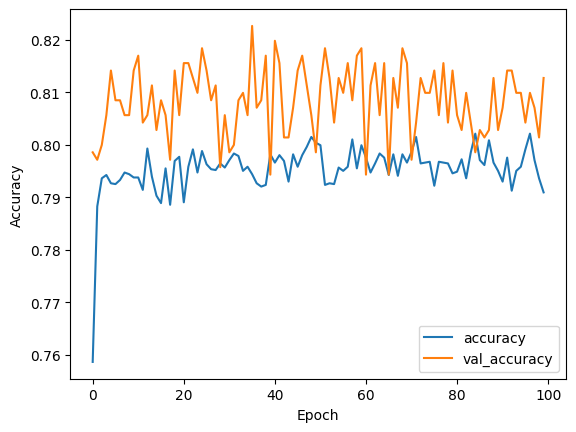

In [128]:

input_layer = Input(shape=(xtrain.shape[1],))
hidden_layer1 = Dense(12, activation="tanh")(input_layer)
dropout_layer = Dropout(0.5)(hidden_layer1)
output_layer = Dense(1, activation='sigmoid')(dropout_layer)

model = keras.Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer=Adamax(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(xtrain, ytrain, epochs=100, batch_size=21, validation_split=0.2, validation_data=(xtest, ytest))

# Evaluate and print results
loss, accuracy = model.evaluate(xtest, ytest)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

# Plot the training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [129]:
accuracy = model.evaluate(xtest,ytest)

23/23 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8128


In [133]:
predictions = model.predict(xtest)
predictions = (predictions>0.5).astype(int)

23/23 [==============================] - 0s 4ms/step


In [134]:
print(roc_auc_score(ytest,predictions))

0.7307775690128632


In [135]:
print(accuracy_score(ytest,predictions))

0.8127659574468085


#Finding feature with high importance to the our target variable so that we train the model with the high importance features.

PermutationExplainer explainer: 706it [00:21, 26.04it/s]                         


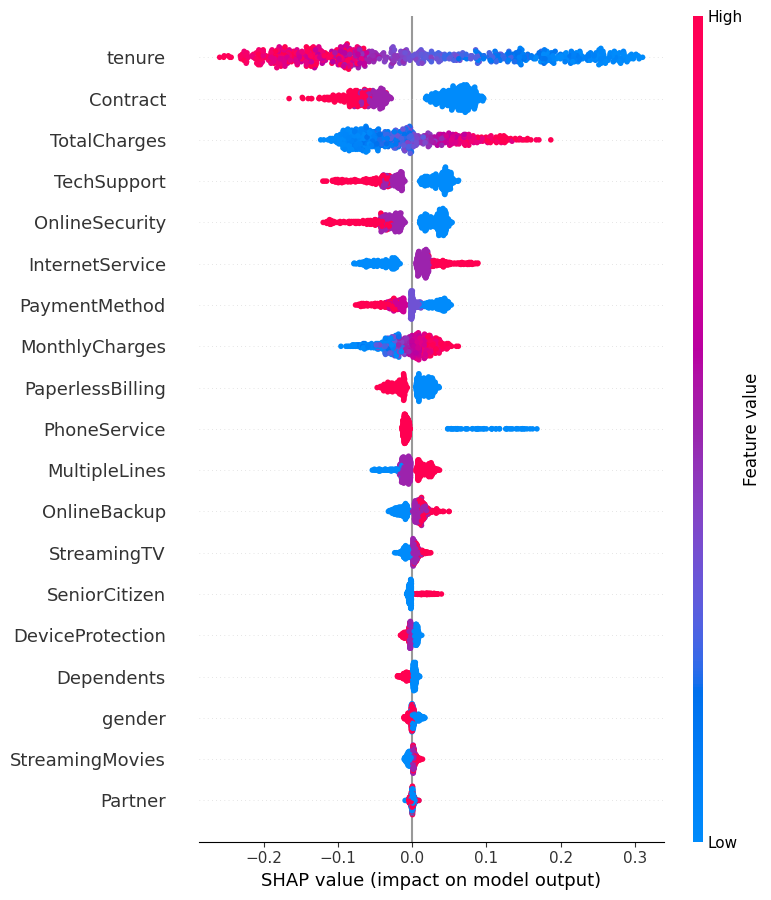

In [150]:
explainer = shap.Explainer(model,xtrain.to_numpy())
shap_values = explainer.shap_values(xtest.to_numpy())
shap.summary_plot(shap_values, xtest, feature_names=xtrain.columns)

#**Training the model with high importance features to our target variable**

I created a variable called retainedda that will encoded and cleaned data we use in the model above

In [154]:
retaineddata = finaldata[["tenure","TotalCharges","InternetService","Contract","OnlineSecurity","TechSupport","PaymentMethod","MonthlyCharges"]]

In [155]:
checking_value = customerdata[["tenure","TotalCharges","InternetService","Contract","OnlineSecurity","TechSupport","PaymentMethod","MonthlyCharges"]]

In [156]:
checking_value.head(5)

,tenure,TotalCharges,InternetService,Contract,OnlineSecurity,TechSupport,PaymentMethod,MonthlyCharges
0,1,29.85,DSL,Month-to-month,No,No,Electronic check,29.85
1,34,1889.5,DSL,One year,Yes,No,Mailed check,56.95
2,2,108.15,DSL,Month-to-month,Yes,No,Mailed check,53.85
3,45,1840.75,DSL,One year,Yes,Yes,Bank transfer (automatic),42.30
4,2,151.65,Fiber optic,Month-to-month,No,No,Electronic check,70.70


In [157]:
retaineddata.head(5)

,tenure,TotalCharges,InternetService,Contract,OnlineSecurity,TechSupport,PaymentMethod,MonthlyCharges
0,1,29.85,0,0,0,0,0,29.85
1,34,1889.50,0,1,1,0,1,56.95
2,2,108.15,0,0,1,0,1,53.85
3,45,1840.75,0,1,1,1,2,42.30
4,2,151.65,1,0,0,0,0,70.70


In [158]:
retaineddata["Churn"] = finaldata[["Churn"]]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [159]:
retaineddata

,tenure,TotalCharges,InternetService,Contract,OnlineSecurity,TechSupport,PaymentMethod,MonthlyCharges,Churn
0,1,29.85,0,0,0,0,0,29.85,0
1,34,1889.50,0,1,1,0,1,56.95,0
2,2,108.15,0,0,1,0,1,53.85,1
3,45,1840.75,0,1,1,1,2,42.30,0
4,2,151.65,1,0,0,0,0,70.70,1
...,...,...,...,...,...,...,...,...,...
7038,24,1990.50,0,1,1,1,1,84.80,0
7039,72,7362.90,1,1,0,0,3,103.20,0
7040,11,346.45,0,0,1,0,0,29.60,0
7041,4,306.60,1,0,0,0,1,74.40,1


In [160]:
X = retaineddata.drop(["Churn"], axis = 1)
Y = retaineddata["Churn"]
finalScaler = StandardScaler()
X = finalScaler.fit_transform(X)

In [161]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y, test_size = 0.2, random_state=42, stratify =Y)

Epoch 1/50
269/269 [==============================] - 3s 4ms/step - loss: 0.4954 - accuracy: 0.7554 - val_loss: 0.4322 - val_accuracy: 0.7885
Epoch 2/50
269/269 [==============================] - 1s 3ms/step - loss: 0.4428 - accuracy: 0.7874 - val_loss: 0.4291 - val_accuracy: 0.7828
Epoch 3/50
269/269 [==============================] - 1s 3ms/step - loss: 0.4422 - accuracy: 0.7886 - val_loss: 0.4298 - val_accuracy: 0.7928
Epoch 4/50
269/269 [==============================] - 1s 3ms/step - loss: 0.4362 - accuracy: 0.7950 - val_loss: 0.4287 - val_accuracy: 0.7878
Epoch 5/50
269/269 [==============================] - 1s 4ms/step - loss: 0.4375 - accuracy: 0.7929 - val_loss: 0.4306 - val_accuracy: 0.7850
Epoch 6/50
269/269 [==============================] - 1s 3ms/step - loss: 0.4377 - accuracy: 0.7886 - val_loss: 0.4283 - val_accuracy: 0.7885
Epoch 7/50
269/269 [==============================] - 1s 3ms/step - loss: 0.4348 - accuracy: 0.7936 - val_loss: 0.4307 - val_accuracy: 0.7814
Epoch 

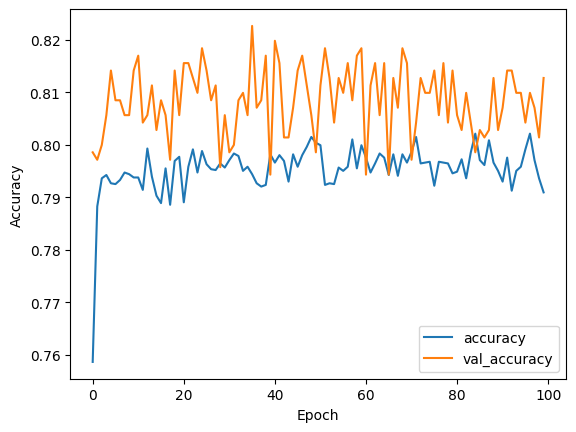

In [164]:
input_layer = Input(shape=(Xtrain.shape[1],))
hidden_layer1 = Dense(12, activation="tanh")(input_layer)
dropout_layer = Dropout(0.5)(hidden_layer1)
output_layer = Dense(1, activation='sigmoid')(dropout_layer)

model1 = keras.Model(inputs=input_layer, outputs=output_layer)

model1.compile(optimizer=Adamax(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

history1 = model1.fit(Xtrain, Ytrain, epochs=50, batch_size=21, validation_split = 0.2,validation_data=(Xtest, Ytest))
loss1, accuracy1 = model1.evaluate(Xtest, Ytest)
print(f'Test loss: {loss1}, Test accuracy: {accuracy1}')
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [165]:
predictions1 = model1.predict(Xtest)
predictions1 = (predictions1>0.5).astype(int)

45/45 [==============================] - 0s 2ms/step


In [166]:
print(roc_auc_score(Ytest,predictions1))

0.702499418739828


In [167]:
print(accuracy_score(Ytest,predictions1))

0.7849538679914834


In [168]:
pip install scikeras

In [169]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
import keras

def create_model(learning_rate=0.01, activation='relu', neurons=3, optimizer='adam'):
    input_layer1 = Input(shape=(Xtrain.shape[1],))
    input_layer2 = Dense(3, activation = activation)(input_layer1)
    output_layer1 = Dense(1, activation='sigmoid')(input_layer2)
    model = keras.Model(inputs=input_layer1, outputs=output_layer1)

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    elif optimizer == 'adagrad':
        opt = Adagrad(learning_rate=learning_rate)
    elif optimizer == 'adadelta':
        opt = Adadelta(learning_rate=learning_rate)
    elif optimizer == 'nadam':
        opt = Nadam(learning_rate=learning_rate)
    else:
        opt = Adam(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model,learning_rate = 0.1, activation = "relu",neurons=3, epochs=25, batch_size=21, verbose=0)


param_grid = {
    'learning_rate': [0.01, 0.001, 0.0001],
    'activation': ['relu', 'sigmoid', 'tanh'],
    'neurons': [3, 6, 12],
    'optimizer': ['adam', 'rmsprop', 'sgd']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(Xtrain, Ytrain)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f, Std: (%f) with: %r" % (mean, stdev, param))


Best: 0.803514 using {'activation': 'relu', 'learning_rate': 0.01, 'neurons': 12, 'optimizer': 'rmsprop'}
Mean: 0.795350, Std: (0.009783) with: {'activation': 'relu', 'learning_rate': 0.01, 'neurons': 3, 'optimizer': 'adam'}
Mean: 0.797125, Std: (0.012328) with: {'activation': 'relu', 'learning_rate': 0.01, 'neurons': 3, 'optimizer': 'rmsprop'}
Mean: 0.797302, Std: (0.008523) with: {'activation': 'relu', 'learning_rate': 0.01, 'neurons': 3, 'optimizer': 'sgd'}
Mean: 0.795350, Std: (0.014224) with: {'activation': 'relu', 'learning_rate': 0.01, 'neurons': 6, 'optimizer': 'adam'}
Mean: 0.799432, Std: (0.007842) with: {'activation': 'relu', 'learning_rate': 0.01, 'neurons': 6, 'optimizer': 'rmsprop'}
Mean: 0.798190, Std: (0.014724) with: {'activation': 'relu', 'learning_rate': 0.01, 'neurons': 6, 'optimizer': 'sgd'}
Mean: 0.800852, Std: (0.011102) with: {'activation': 'relu', 'learning_rate': 0.01, 'neurons': 12, 'optimizer': 'adam'}
Mean: 0.803514, Std: (0.008261) with: {'activation': 're

#Final trained with the best hyperparameters and optimizer

Epoch 1/1000
109/109 [==============================] - 1s 4ms/step - loss: 0.4920 - accuracy: 0.7542 - val_loss: 0.4404 - val_accuracy: 0.7743
Epoch 2/1000
109/109 [==============================] - 0s 3ms/step - loss: 0.4535 - accuracy: 0.7741 - val_loss: 0.4354 - val_accuracy: 0.7764
Epoch 3/1000
109/109 [==============================] - 0s 4ms/step - loss: 0.4518 - accuracy: 0.7858 - val_loss: 0.4324 - val_accuracy: 0.7899
Epoch 4/1000
109/109 [==============================] - 0s 4ms/step - loss: 0.4506 - accuracy: 0.7826 - val_loss: 0.4321 - val_accuracy: 0.7850
Epoch 5/1000
109/109 [==============================] - 0s 4ms/step - loss: 0.4468 - accuracy: 0.7831 - val_loss: 0.4322 - val_accuracy: 0.7814
Epoch 6/1000
109/109 [==============================] - 1s 5ms/step - loss: 0.4441 - accuracy: 0.7870 - val_loss: 0.4316 - val_accuracy: 0.7999
Epoch 7/1000
109/109 [==============================] - 0s 4ms/step - loss: 0.4453 - accuracy: 0.7817 - val_loss: 0.4350 - val_accuracy:

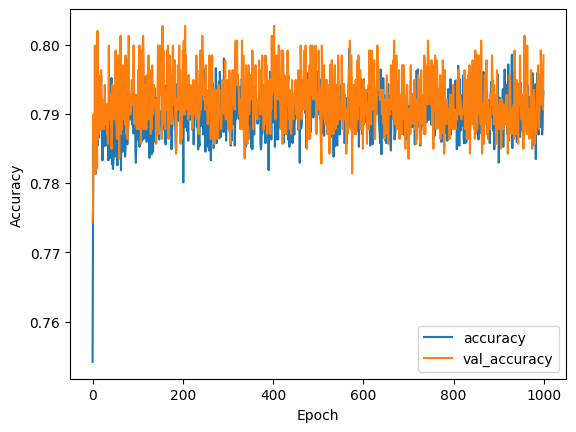

In [172]:
input_layer = Input(shape=(Xtrain.shape[1],))
hidden_layer1 = Dense(12, activation="relu")(input_layer)
dropout_layer = Dropout(0.5)(hidden_layer1)
output_layer = Dense(1, activation='sigmoid')(dropout_layer)

finalmodel = keras.Model(inputs=input_layer, outputs=output_layer)

finalmodel.compile(optimizer=RMSprop(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

historyfinal = finalmodel.fit(Xtrain, Ytrain, epochs=1000, batch_size=52, validation_split = 0.2,validation_data=(Xtest, Ytest))
lossfinal, accuracyfinal = model1.evaluate(Xtest, Ytest)
print(f'Test loss: {lossfinal}, Test accuracy: {accuracyfinal}')
import matplotlib.pyplot as plt
plt.plot(historyfinal.history['accuracy'], label='accuracy')
plt.plot(historyfinal.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

#Loading the model

In [173]:

import joblib

joblib.dump(finalScaler, '/content/drive/MyDrive/IntroAi/churnscaler.joblib')
finalmodel.save("/content/drive/MyDrive/IntroAi/finalmodel")

In [174]:
from keras.models import load_model


loaded_model = load_model("/content/drive/MyDrive/IntroAi/finalmodel")

# Verify the loaded model
loaded_model.summary()  # To check the model's architecture and summary

Model: "model_514"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_515 (InputLayer)      [(None, 8)]               0         
                                                                 
 dense_1020 (Dense)          (None, 12)                108       
                                                                 
 dropout_8 (Dropout)         (None, 12)                0         
                                                                 
 dense_1021 (Dense)          (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
